In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\Cardiotocographic.csv")

In [3]:
df.head(4)

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0  120.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   2.4   
1  132.0  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0  10.4   
2  133.0  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0  13.4   
3  134.0  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0  23.0   

   Width  Tendency  NSP  
0   64.0  0.999926  2.0  
1  130.0  0.000000  1.0  
2  130.0  0.000000  1.0  
3  117.0  1.000000  1.0

In [4]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

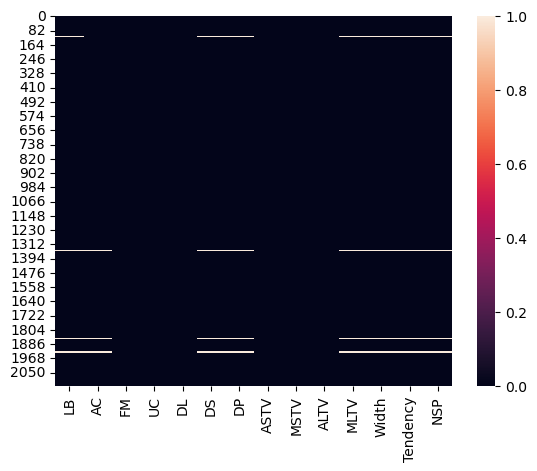

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
df.select_dtypes(include='float64').columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [9]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
for col in df.select_dtypes(include=['float64']).columns:
    print(f"Unique values in '{col}':\n", df[col].unique())

Unique values in 'LB':
 [120.         132.         133.         134.         131.94823162
 122.         151.         150.         131.         130.
 129.         128.         124.         115.         114.
 116.         158.         156.         147.81657385 149.
 146.         148.         144.         142.         136.
 141.         138.         140.         154.         145.
 144.93508565 139.         125.         123.         159.
 158.75766557  52.         143.         148.96141613 119.
 118.9736874  121.         137.8325398  123.78909453 127.
 128.84390776 125.14358925 124.62776778 123.3350051  125.80994939
 126.         118.         135.         144.34576434 146.00059107
 137.         134.72723786 133.28233138 137.82451993 140.52416935
 149.95442235 147.         214.         136.66065106 125.12265281
 151.17863367 157.         156.86235589 128.3759678  143.45812176
 142.11653388 143.94636332 136.14298944 122.64579013 123.15993089
 140.09077045 130.03041758 130.11851905 131.987197

In [11]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [12]:
numerical_columns = df.select_dtypes(include=['float64']).columns
outliers = {}
for col in numerical_columns:
    outliers[col] = detect_outliers_iqr(df, col)


In [13]:
outlier_counts = {col: len(outliers[col]) for col in numerical_columns}
print("Outlier Counts Per Column:\n", outlier_counts)

Outlier Counts Per Column:
 {'LB': 10, 'AC': 43, 'FM': 347, 'UC': 13, 'DL': 125, 'DS': 120, 'DP': 284, 'ASTV': 10, 'MSTV': 80, 'ALTV': 318, 'MLTV': 81, 'Width': 10, 'Tendency': 10, 'NSP': 559}


In [14]:
col=df.columns

In [15]:
def plot_boxplot(data, column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

Visualizing LB:


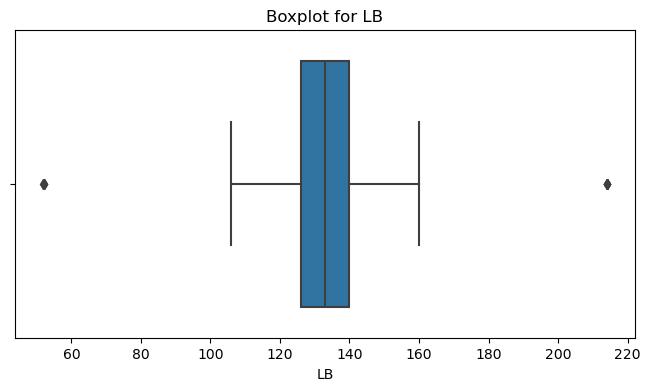

Visualizing AC:


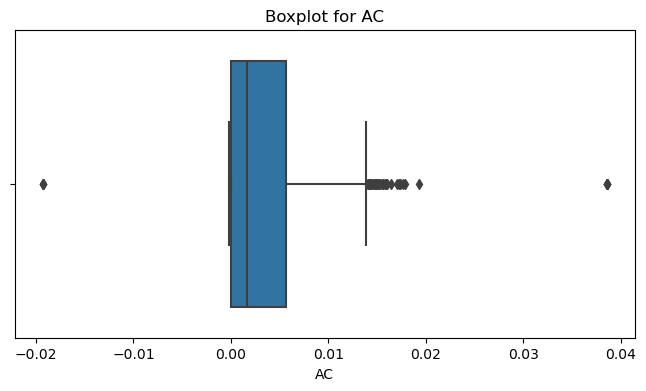

Visualizing FM:


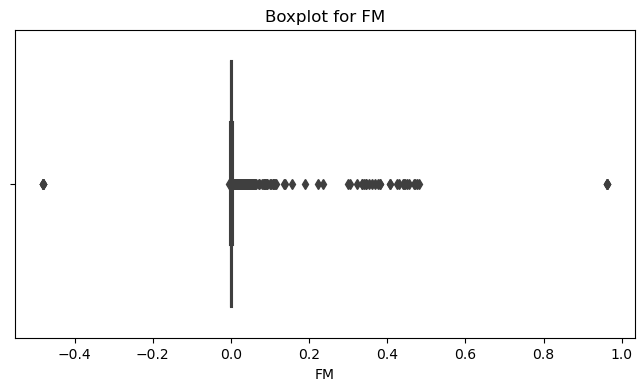

Visualizing UC:


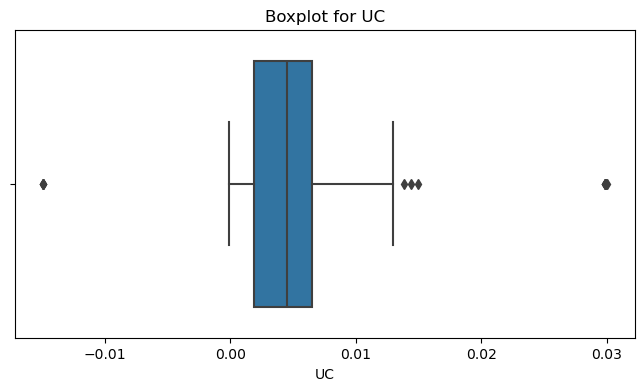

Visualizing DL:


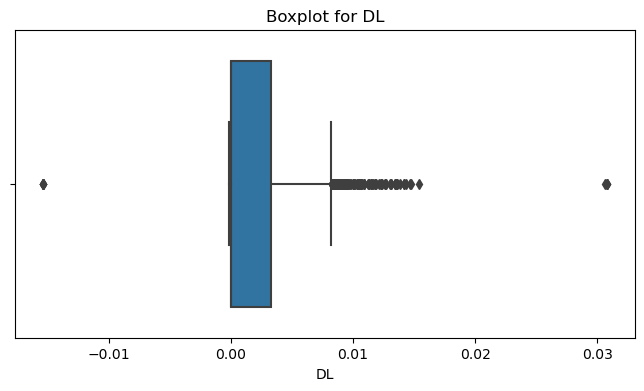

Visualizing DS:


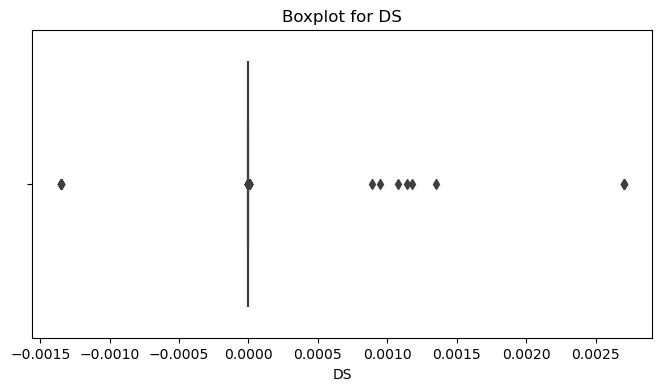

Visualizing DP:


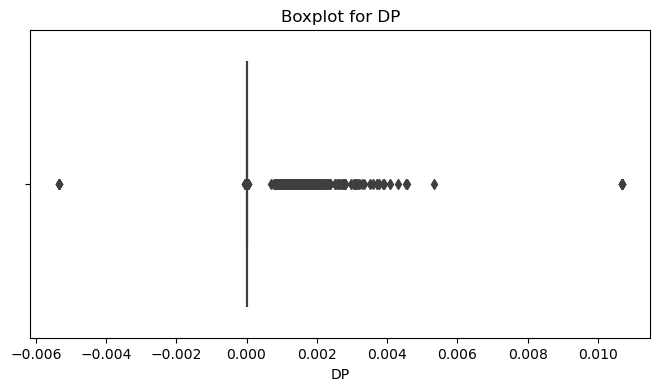

Visualizing ASTV:


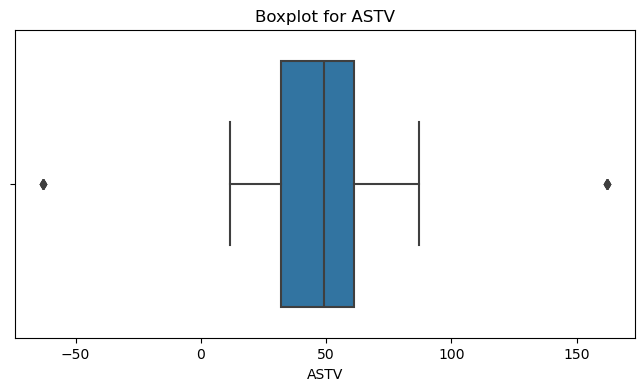

Visualizing MSTV:


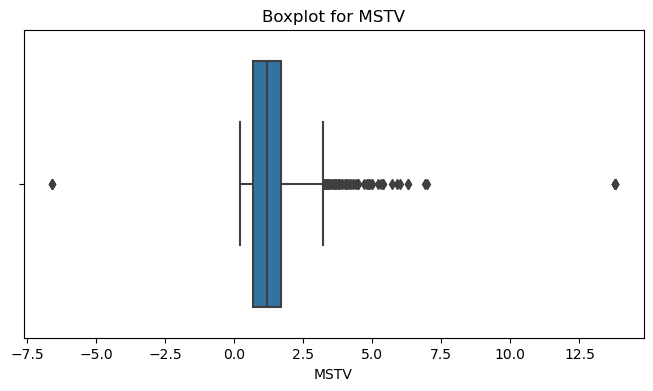

Visualizing ALTV:


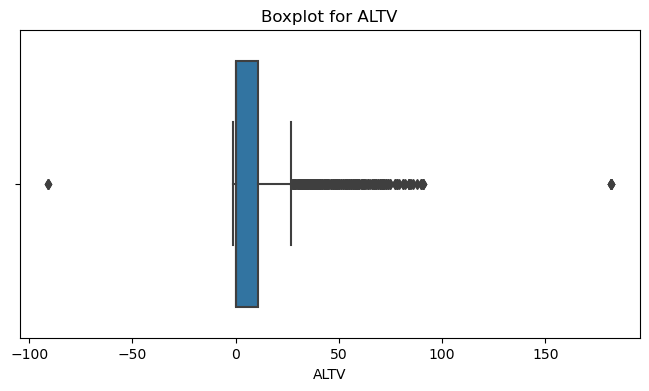

Visualizing MLTV:


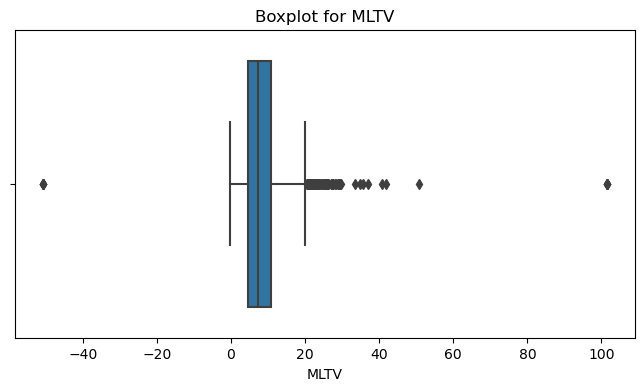

Visualizing Width:


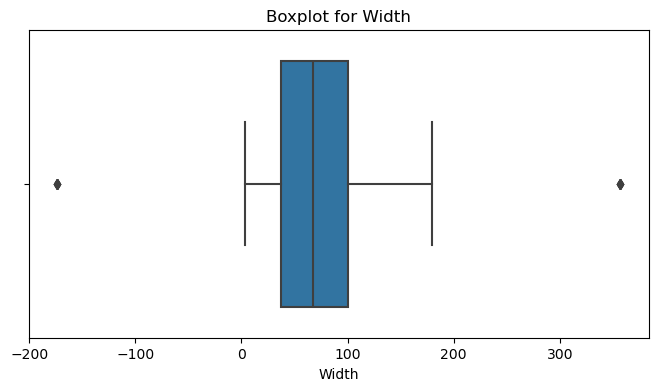

Visualizing Tendency:


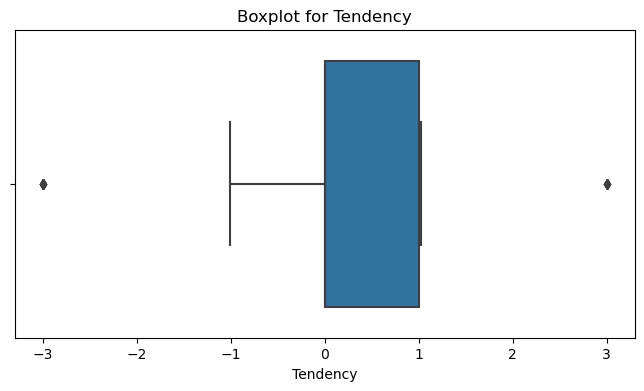

Visualizing NSP:


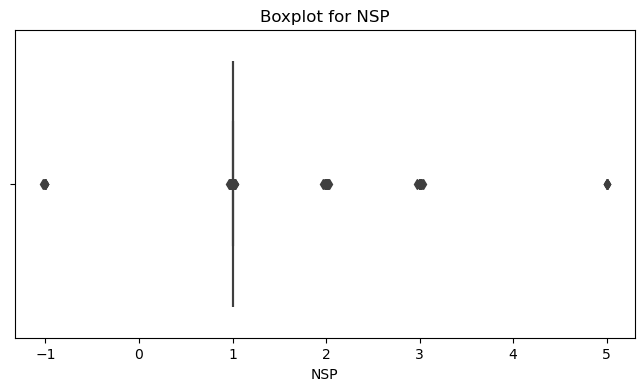

In [16]:
for col in numerical_columns:
    print(f"Visualizing {col}:")
    plot_boxplot(df, col)

In [17]:
def plot_distplot(data, column):
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')  # Histogram with KDE
    plt.title(f"Distribution Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

Visualizing LB:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


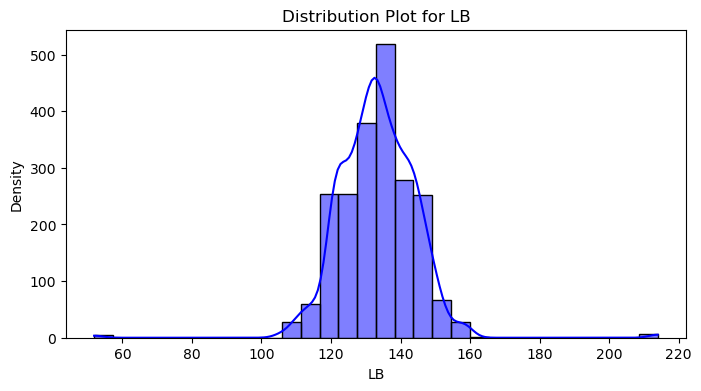

Visualizing AC:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


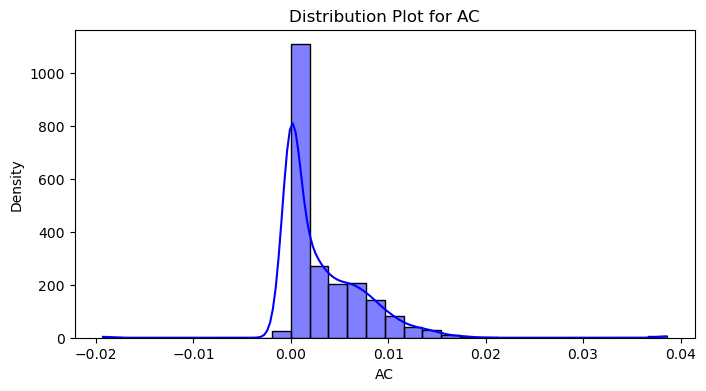

Visualizing FM:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


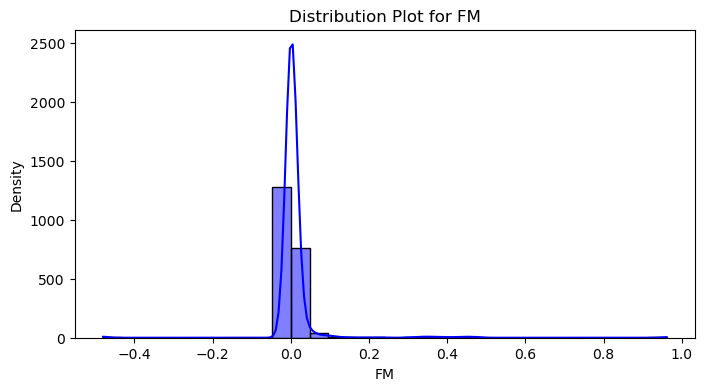

Visualizing UC:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


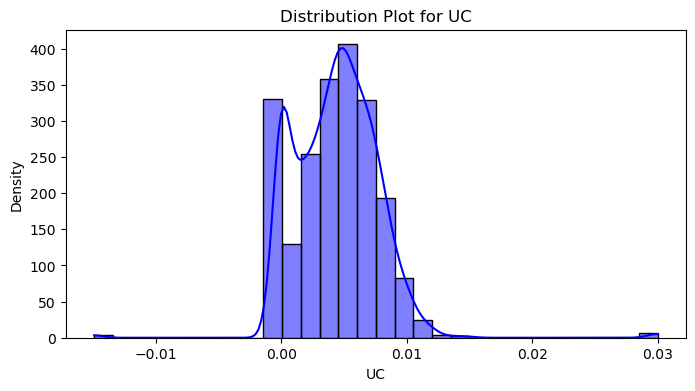

Visualizing DL:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


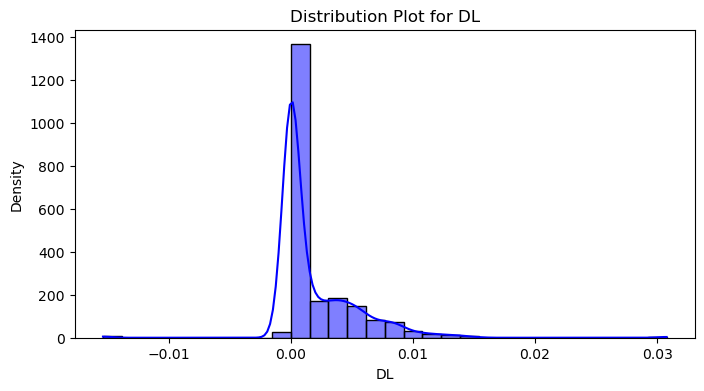

Visualizing DS:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


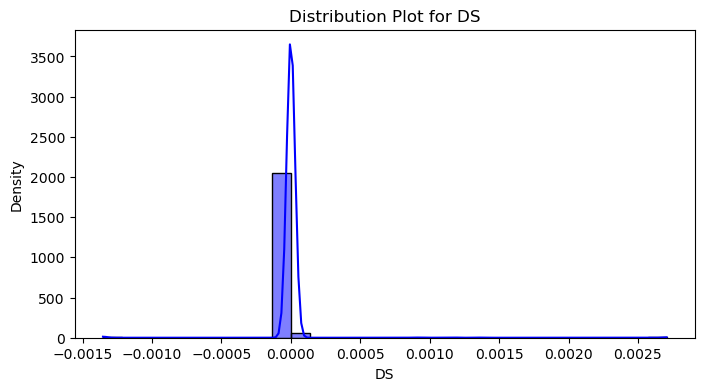

Visualizing DP:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


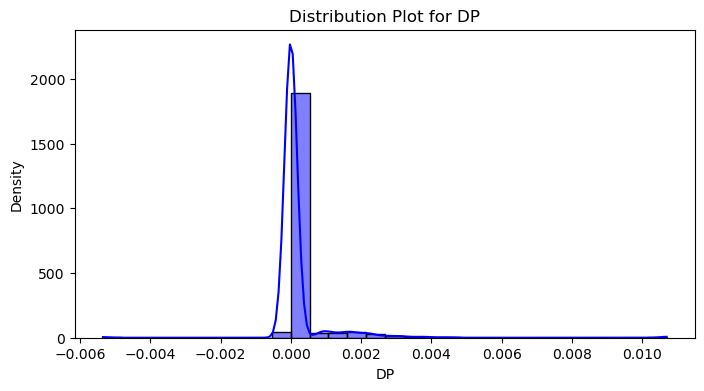

Visualizing ASTV:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


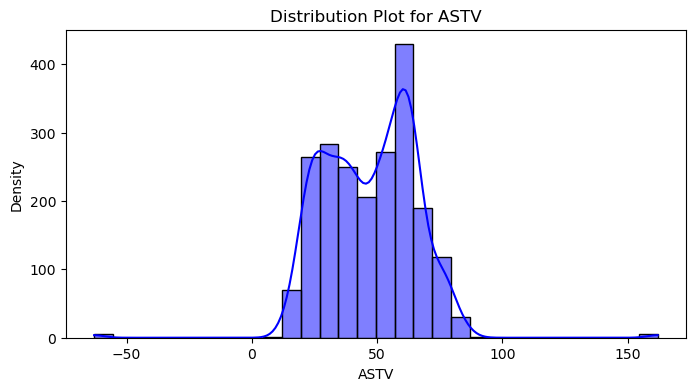

Visualizing MSTV:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


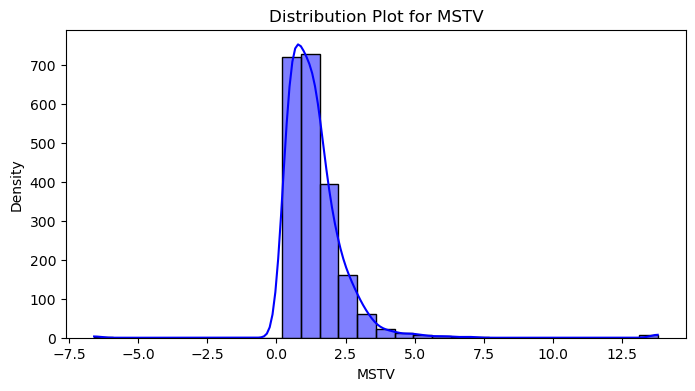

Visualizing ALTV:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


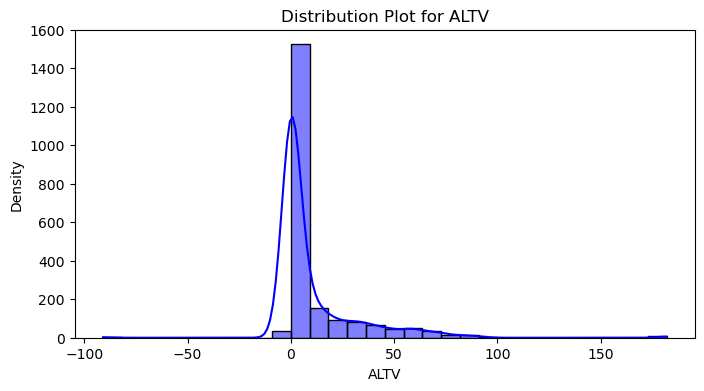

Visualizing MLTV:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


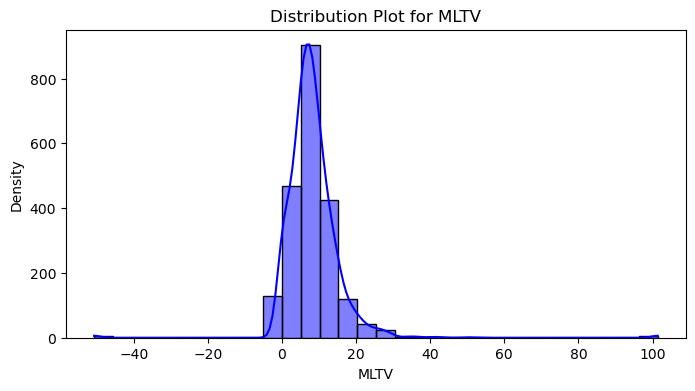

Visualizing Width:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


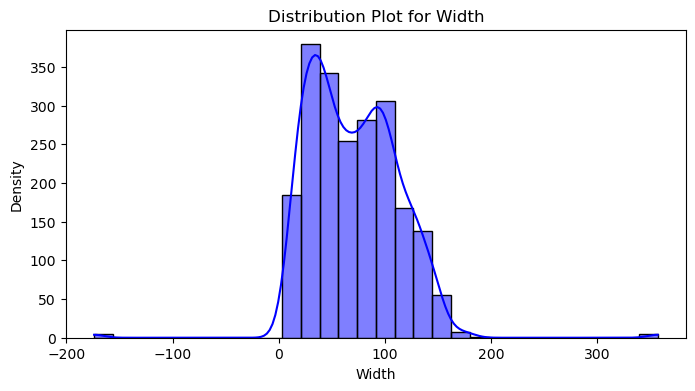

Visualizing Tendency:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


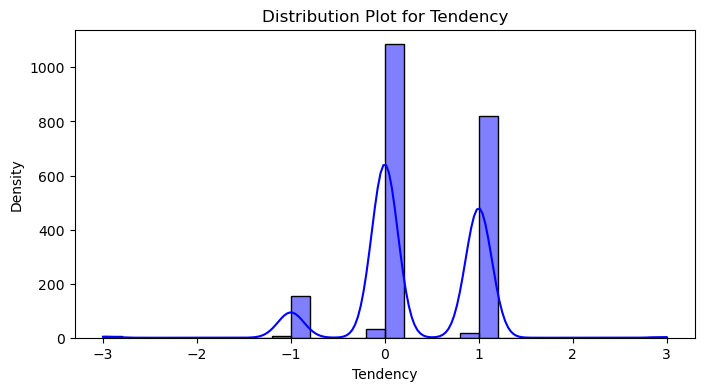

Visualizing NSP:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


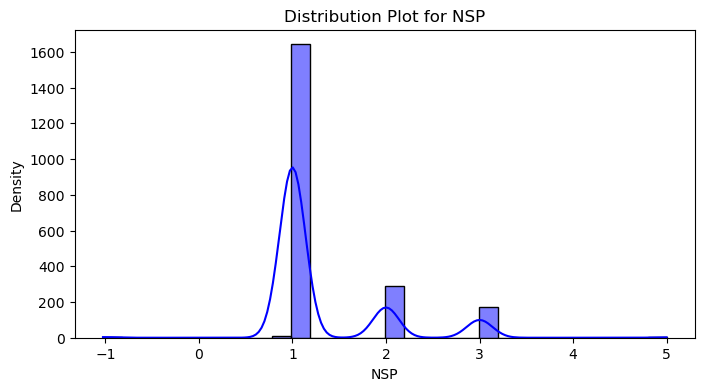

In [18]:
for col in numerical_columns:
    print(f"Visualizing {col}:")
    plot_distplot(df, col)

In [19]:
for col in numerical_columns:
    lower_bound = df[col].quantile(0.01)  # 1st percentile
    upper_bound = df[col].quantile(0.99)  # 99th percentile
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [20]:
print("Outlier Counts After Capping:\n", {
    col: len(detect_outliers_iqr(df, col)) for col in numerical_columns
})

Outlier Counts After Capping:
 {'LB': 0, 'AC': 39, 'FM': 340, 'UC': 0, 'DL': 119, 'DS': 120, 'DP': 284, 'ASTV': 0, 'MSTV': 77, 'ALTV': 315, 'MLTV': 76, 'Width': 0, 'Tendency': 0, 'NSP': 559}


In [21]:
df[df.duplicated()]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0

In [22]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [23]:
for column in df.select_dtypes(include=['float64']):
    print(f"\nInteresting Findings for {column}:")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"Interquartile Range (IQR): {df[column].quantile(0.75) - df[column].quantile(0.25)}")
    print(f"Any outliers (values outside 1.5*IQR range):")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * iqr
    upper_bound = df[column].quantile(0.75) + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(outliers[column])


Interesting Findings for LB:
Mean: 133.297411094553
Median: 133.0
Standard Deviation: 9.831521376895193
Interquartile Range (IQR): 14.0
Any outliers (values outside 1.5*IQR range):
Series([], Name: LB, dtype: float64)

Interesting Findings for AC:
Mean: 0.003164608495735828
Median: 0.001633991
Standard Deviation: 0.0038450831675133712
Interquartile Range (IQR): 0.005612068
Any outliers (values outside 1.5*IQR range):
8       0.015153
83      0.014706
85      0.014230
116     0.015153
181     0.015153
496     0.014178
497     0.015153
498     0.015153
500     0.014178
501     0.014726
526     0.015013
527     0.014065
529     0.015153
530     0.015153
531     0.015153
552     0.015153
616     0.014806
626     0.015153
630     0.015153
1000    0.014907
1066    0.014303
1093    0.015153
1094    0.015153
1096    0.015153
1230    0.015153
1247    0.015153
1310    0.014320
1311    0.015113
1685    0.014400
1855    0.014068
1856    0.015153
1857    0.015153
1858    0.015153
1859    0.014444


The median for many features (e.g., FM, ALTV, and Tendency) is 0, while the mean is significantly higher. This suggests a right-skewed distribution.

Features like LB and Width have much larger ranges than DS, DP, or MSTV. Scaling methods like Min-Max scaling or StandardScaler are required to standardize ranges.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


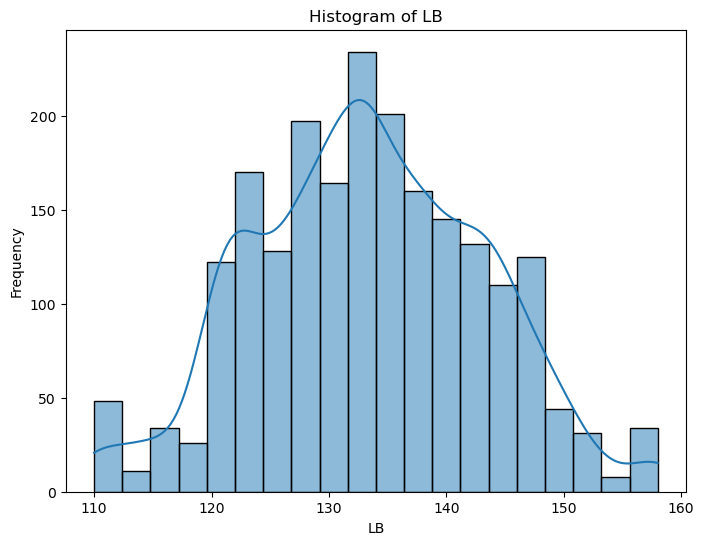

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


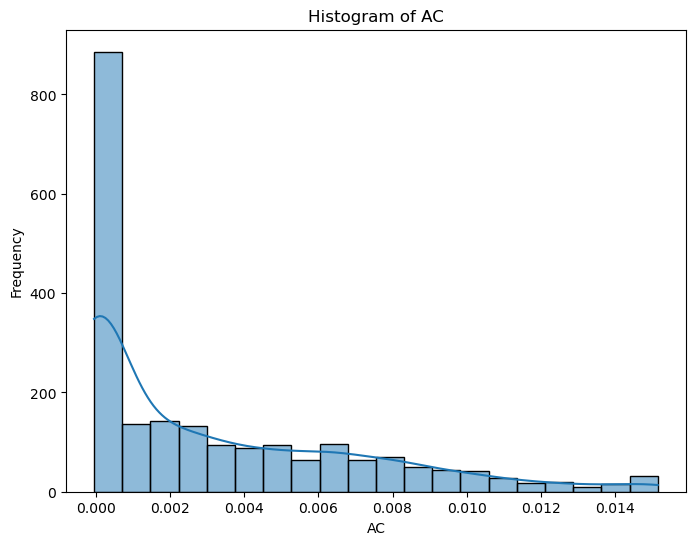

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


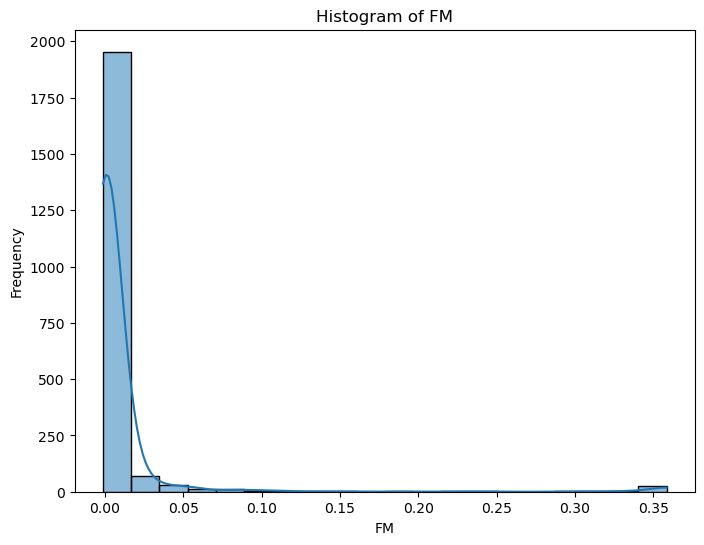

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


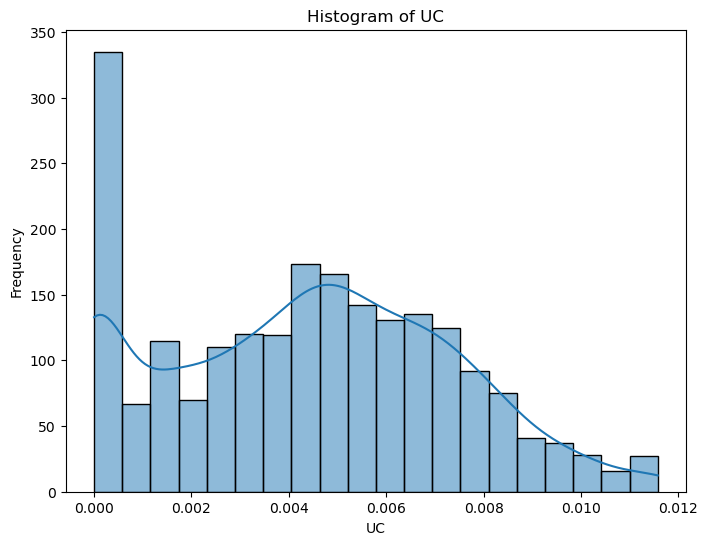

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


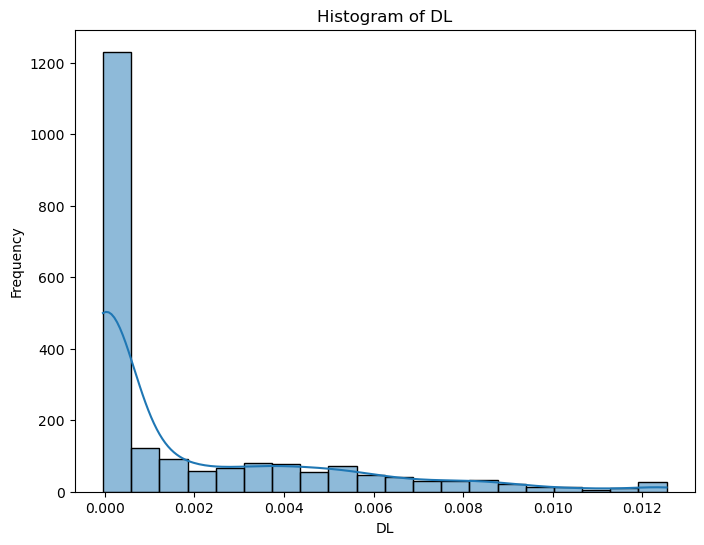

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


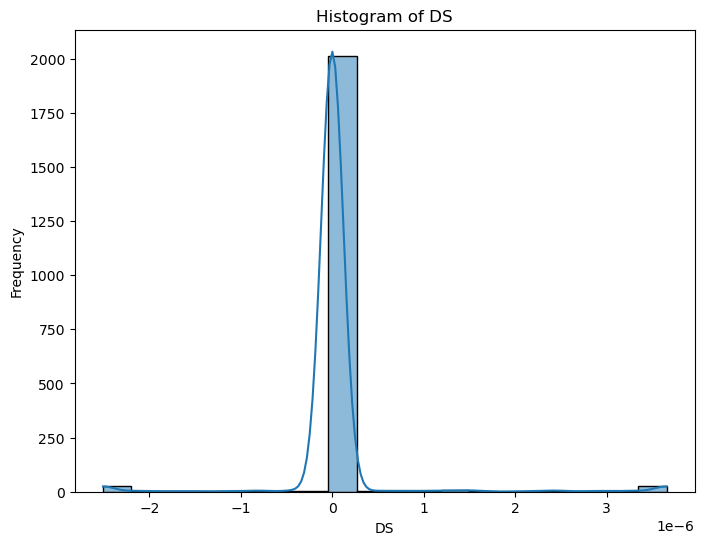

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


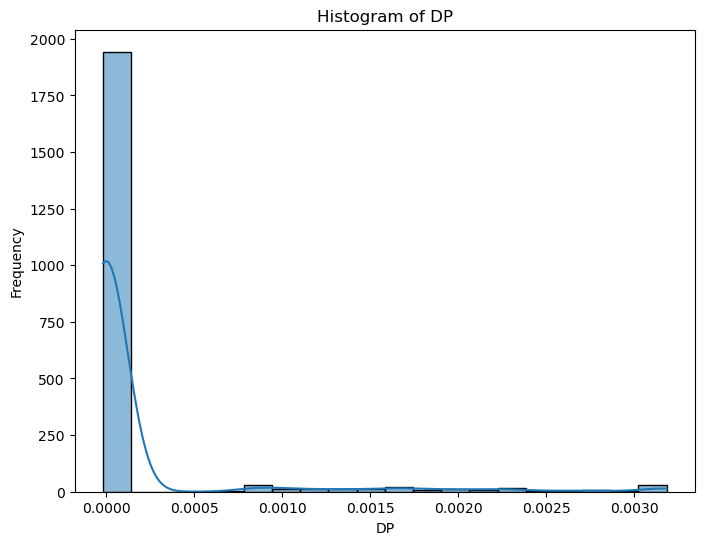

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


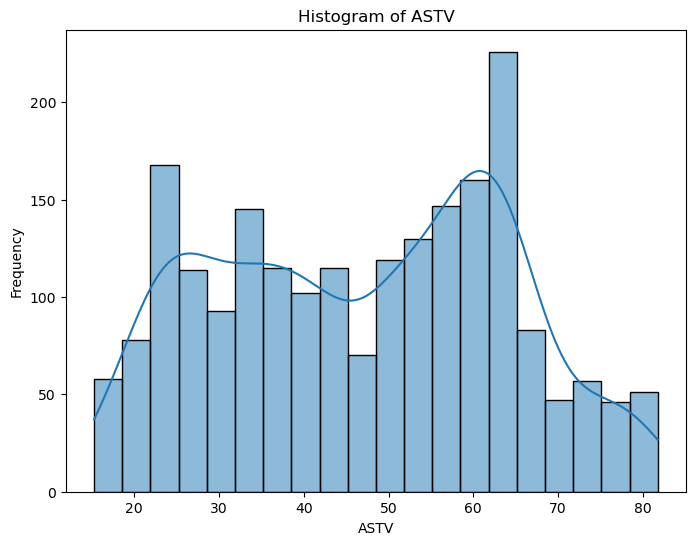

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


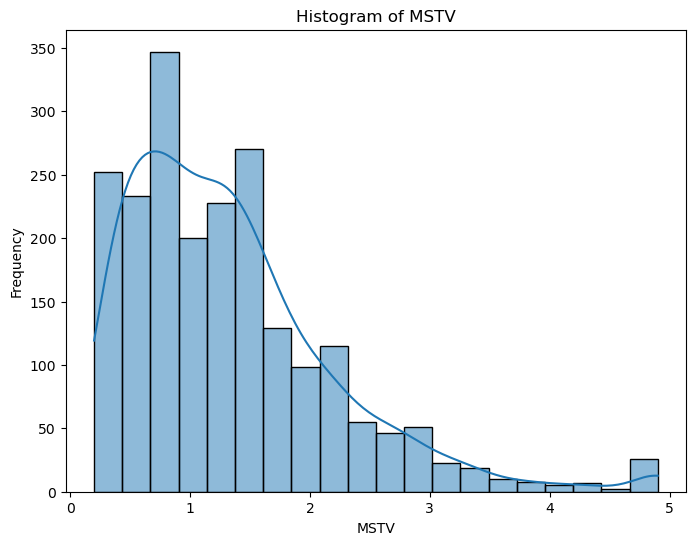

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


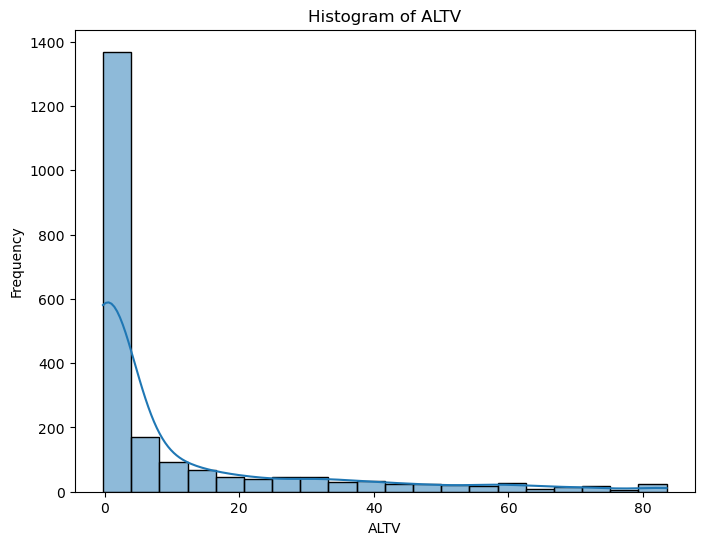

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


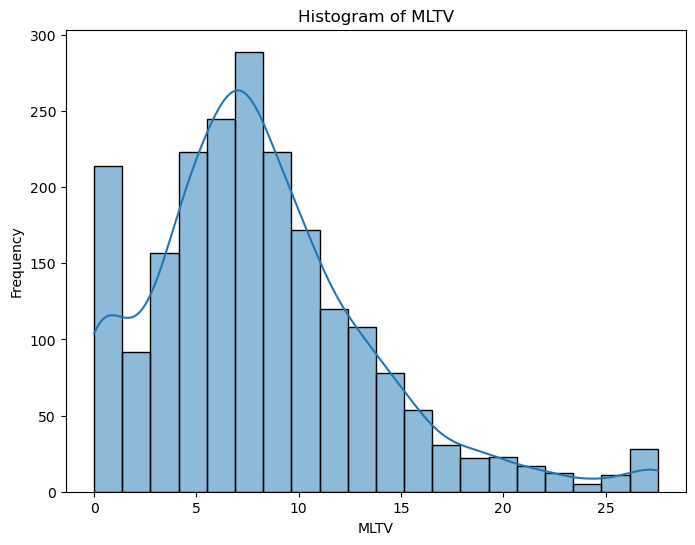

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


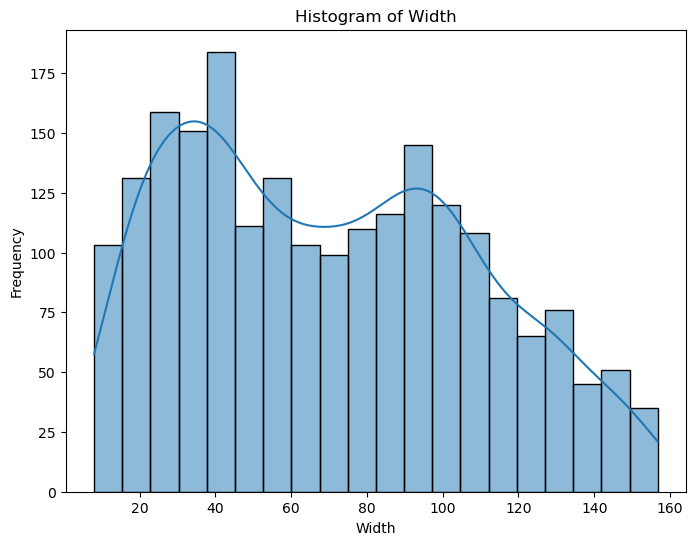

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


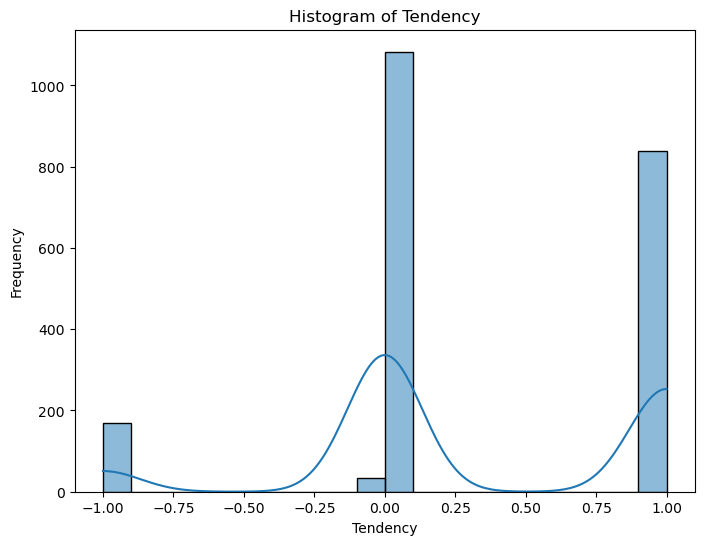

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


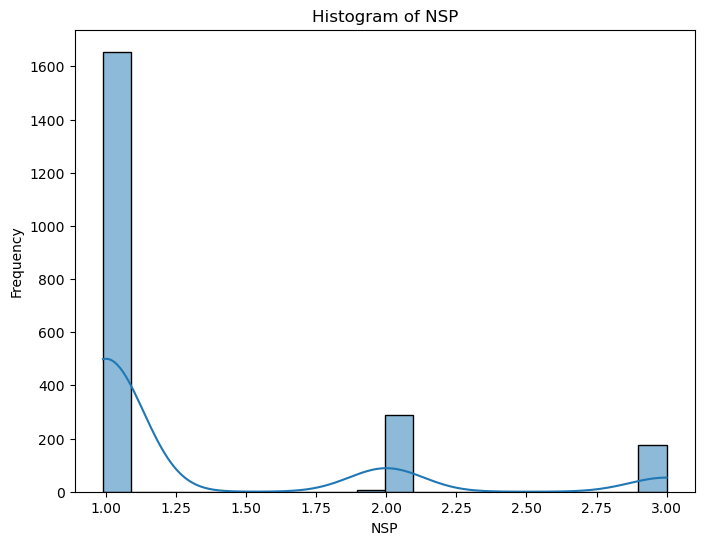

In [24]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

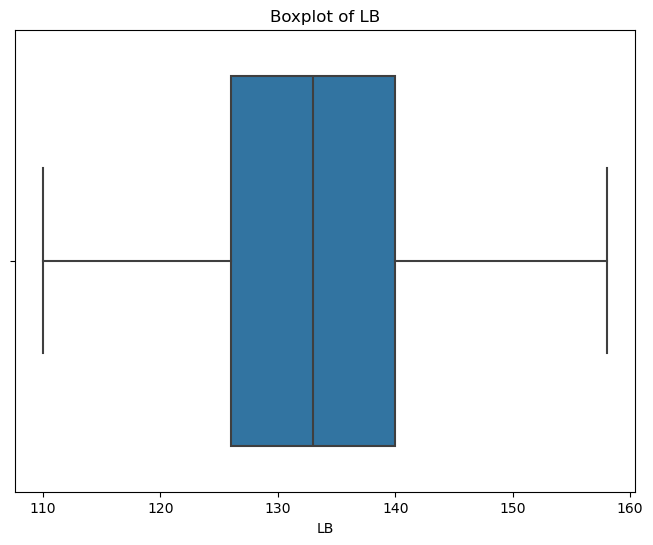

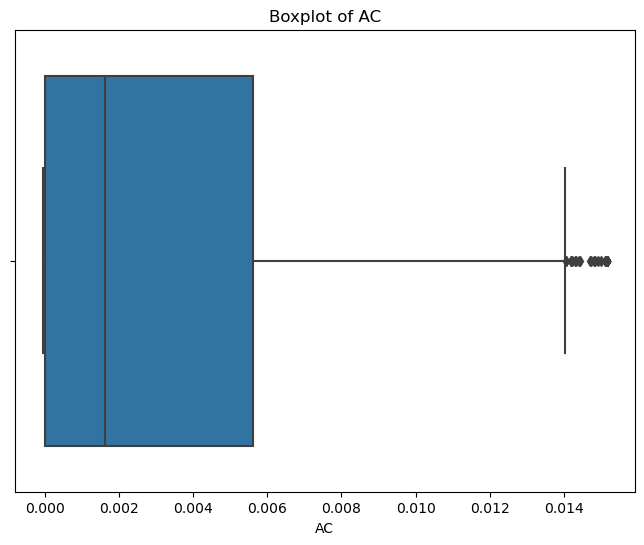

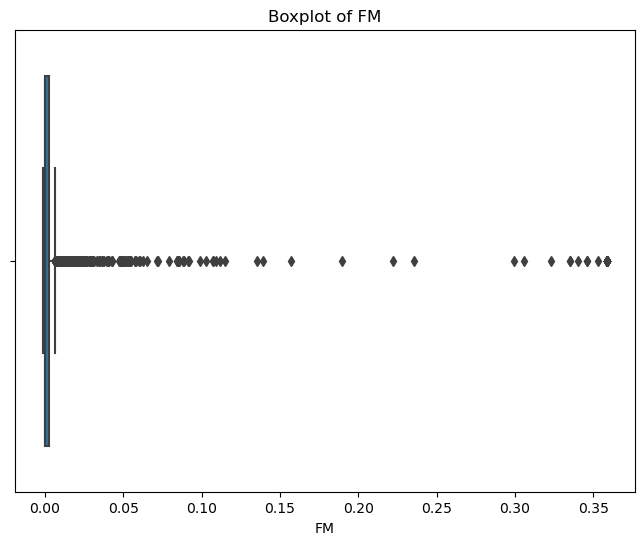

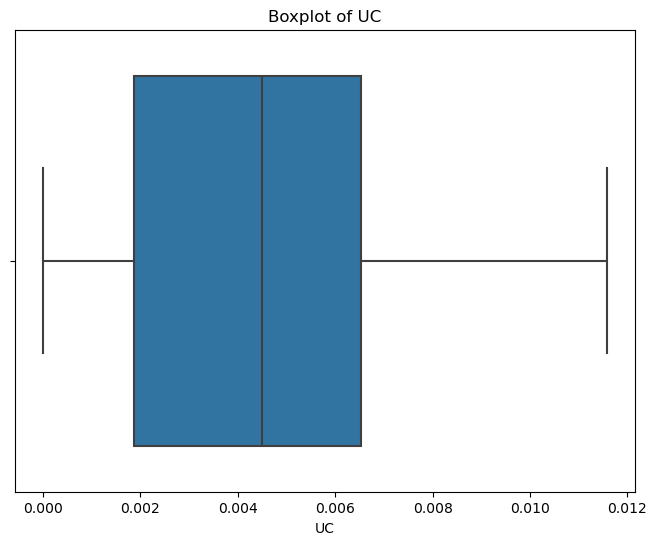

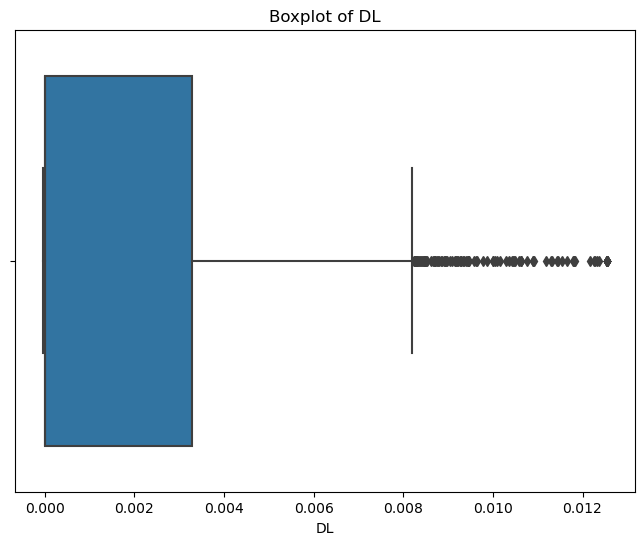

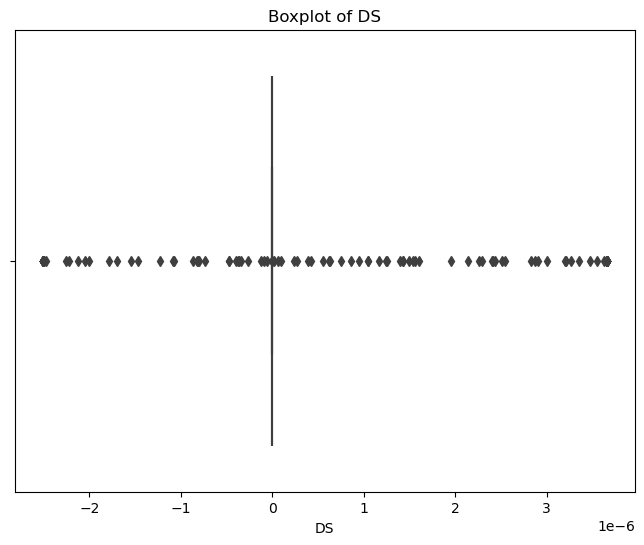

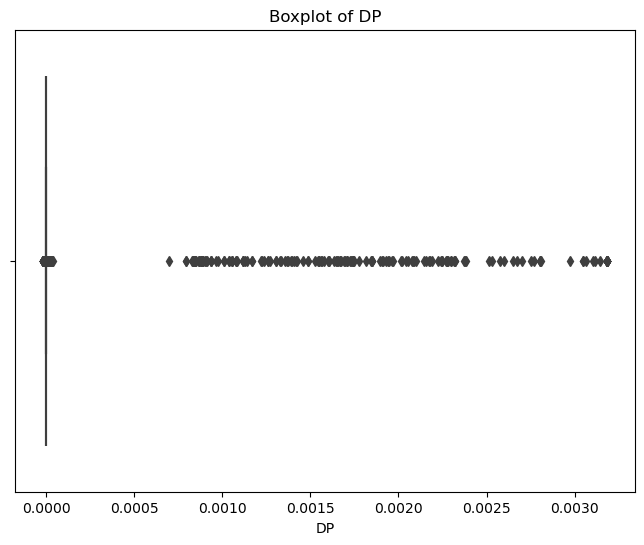

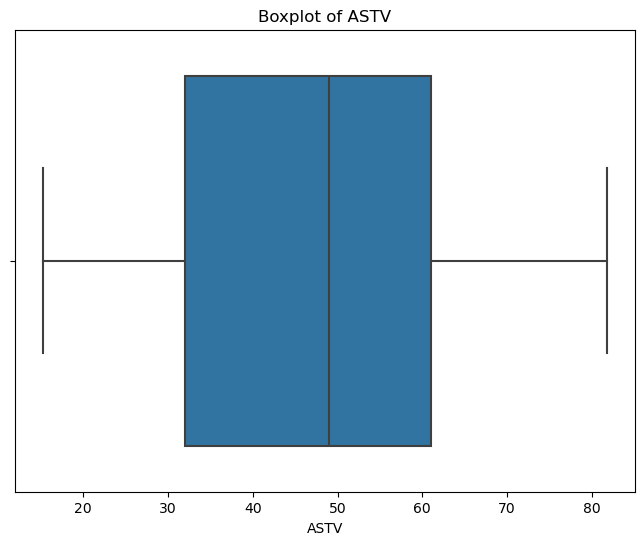

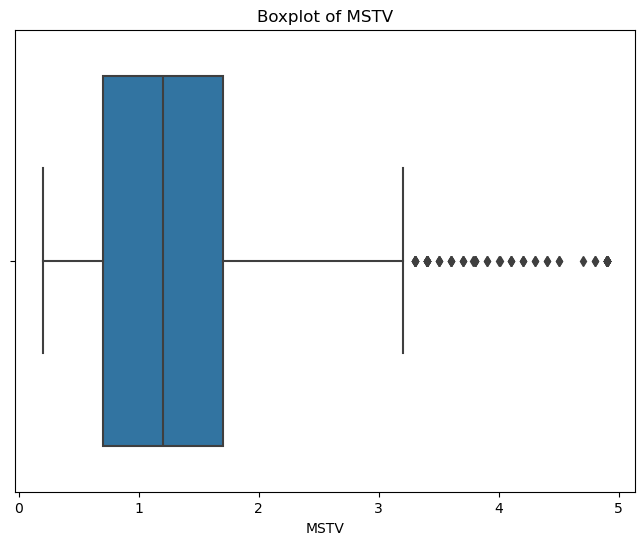

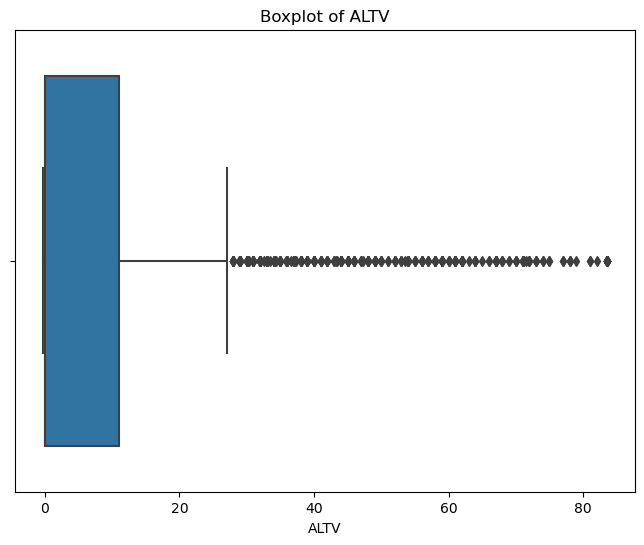

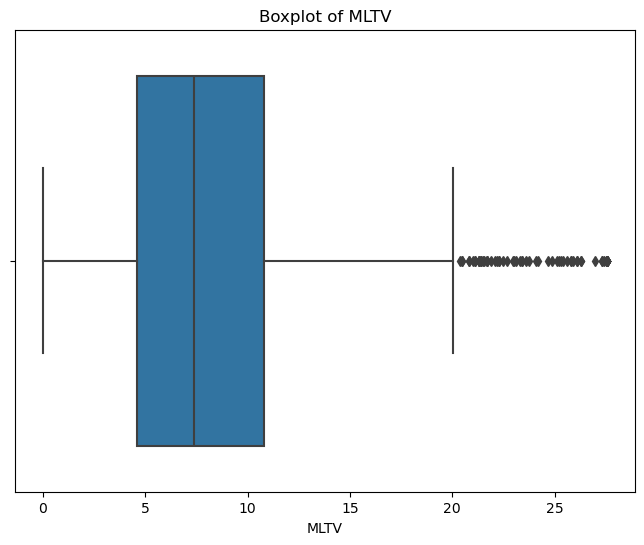

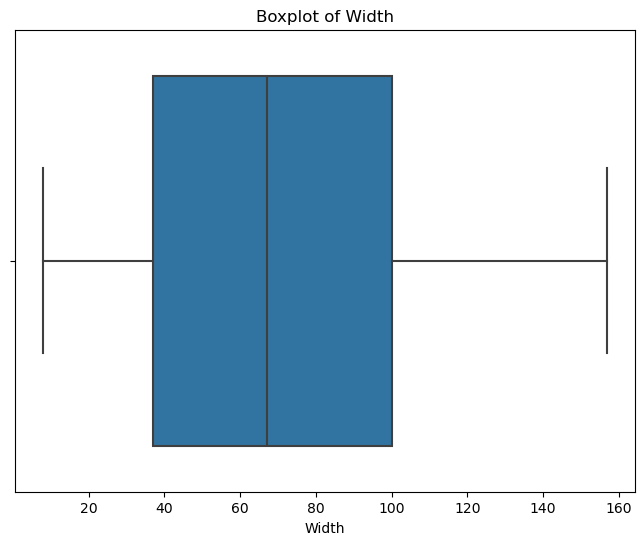

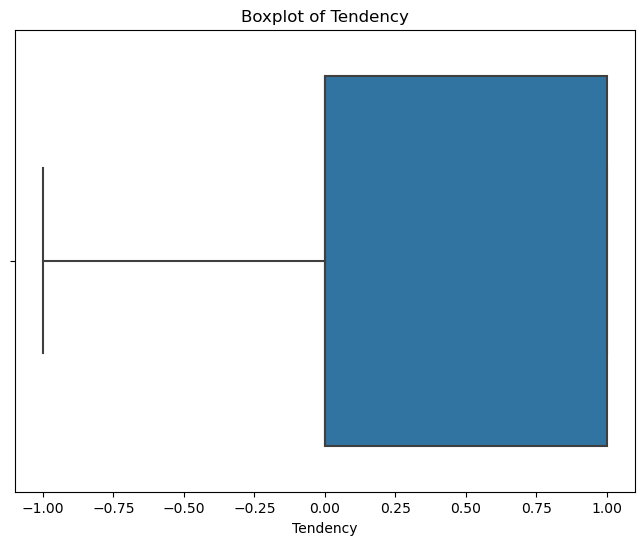

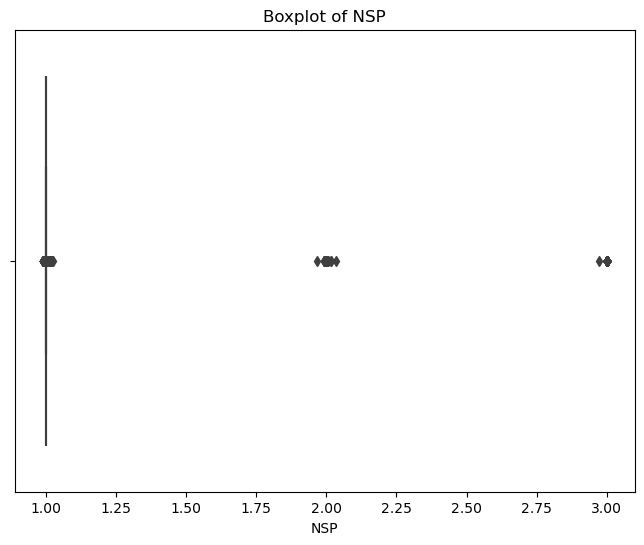

In [25]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

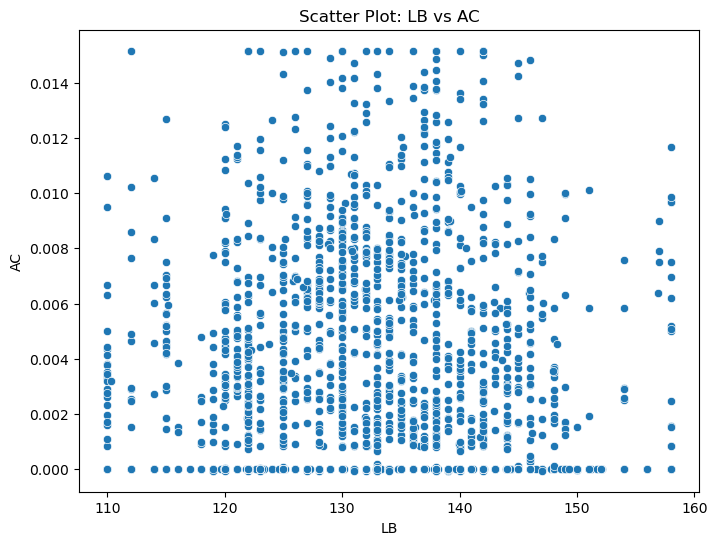

In [27]:
if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]])
    plt.title(f"Scatter Plot: {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()

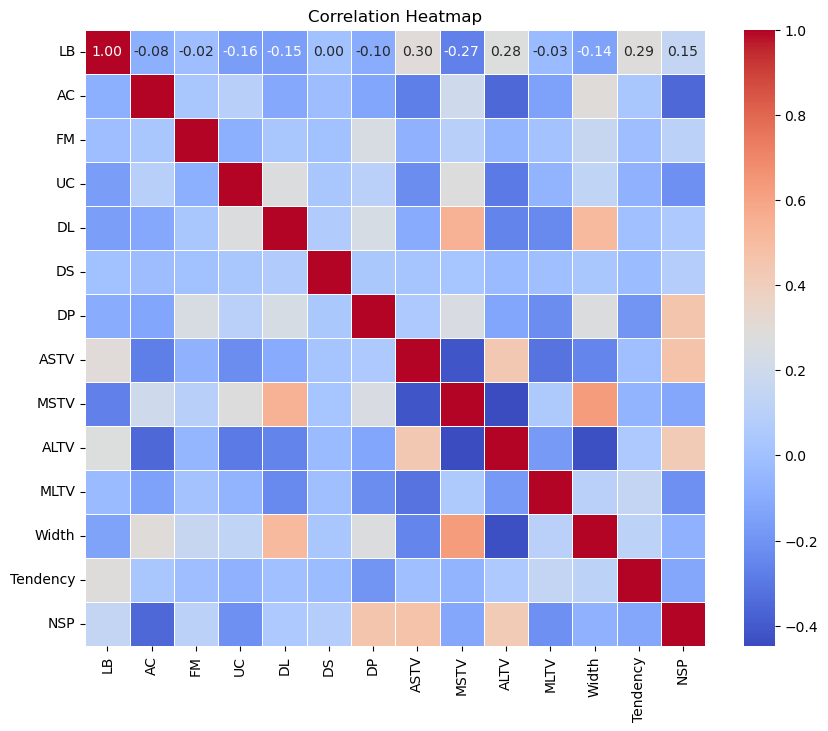

In [28]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

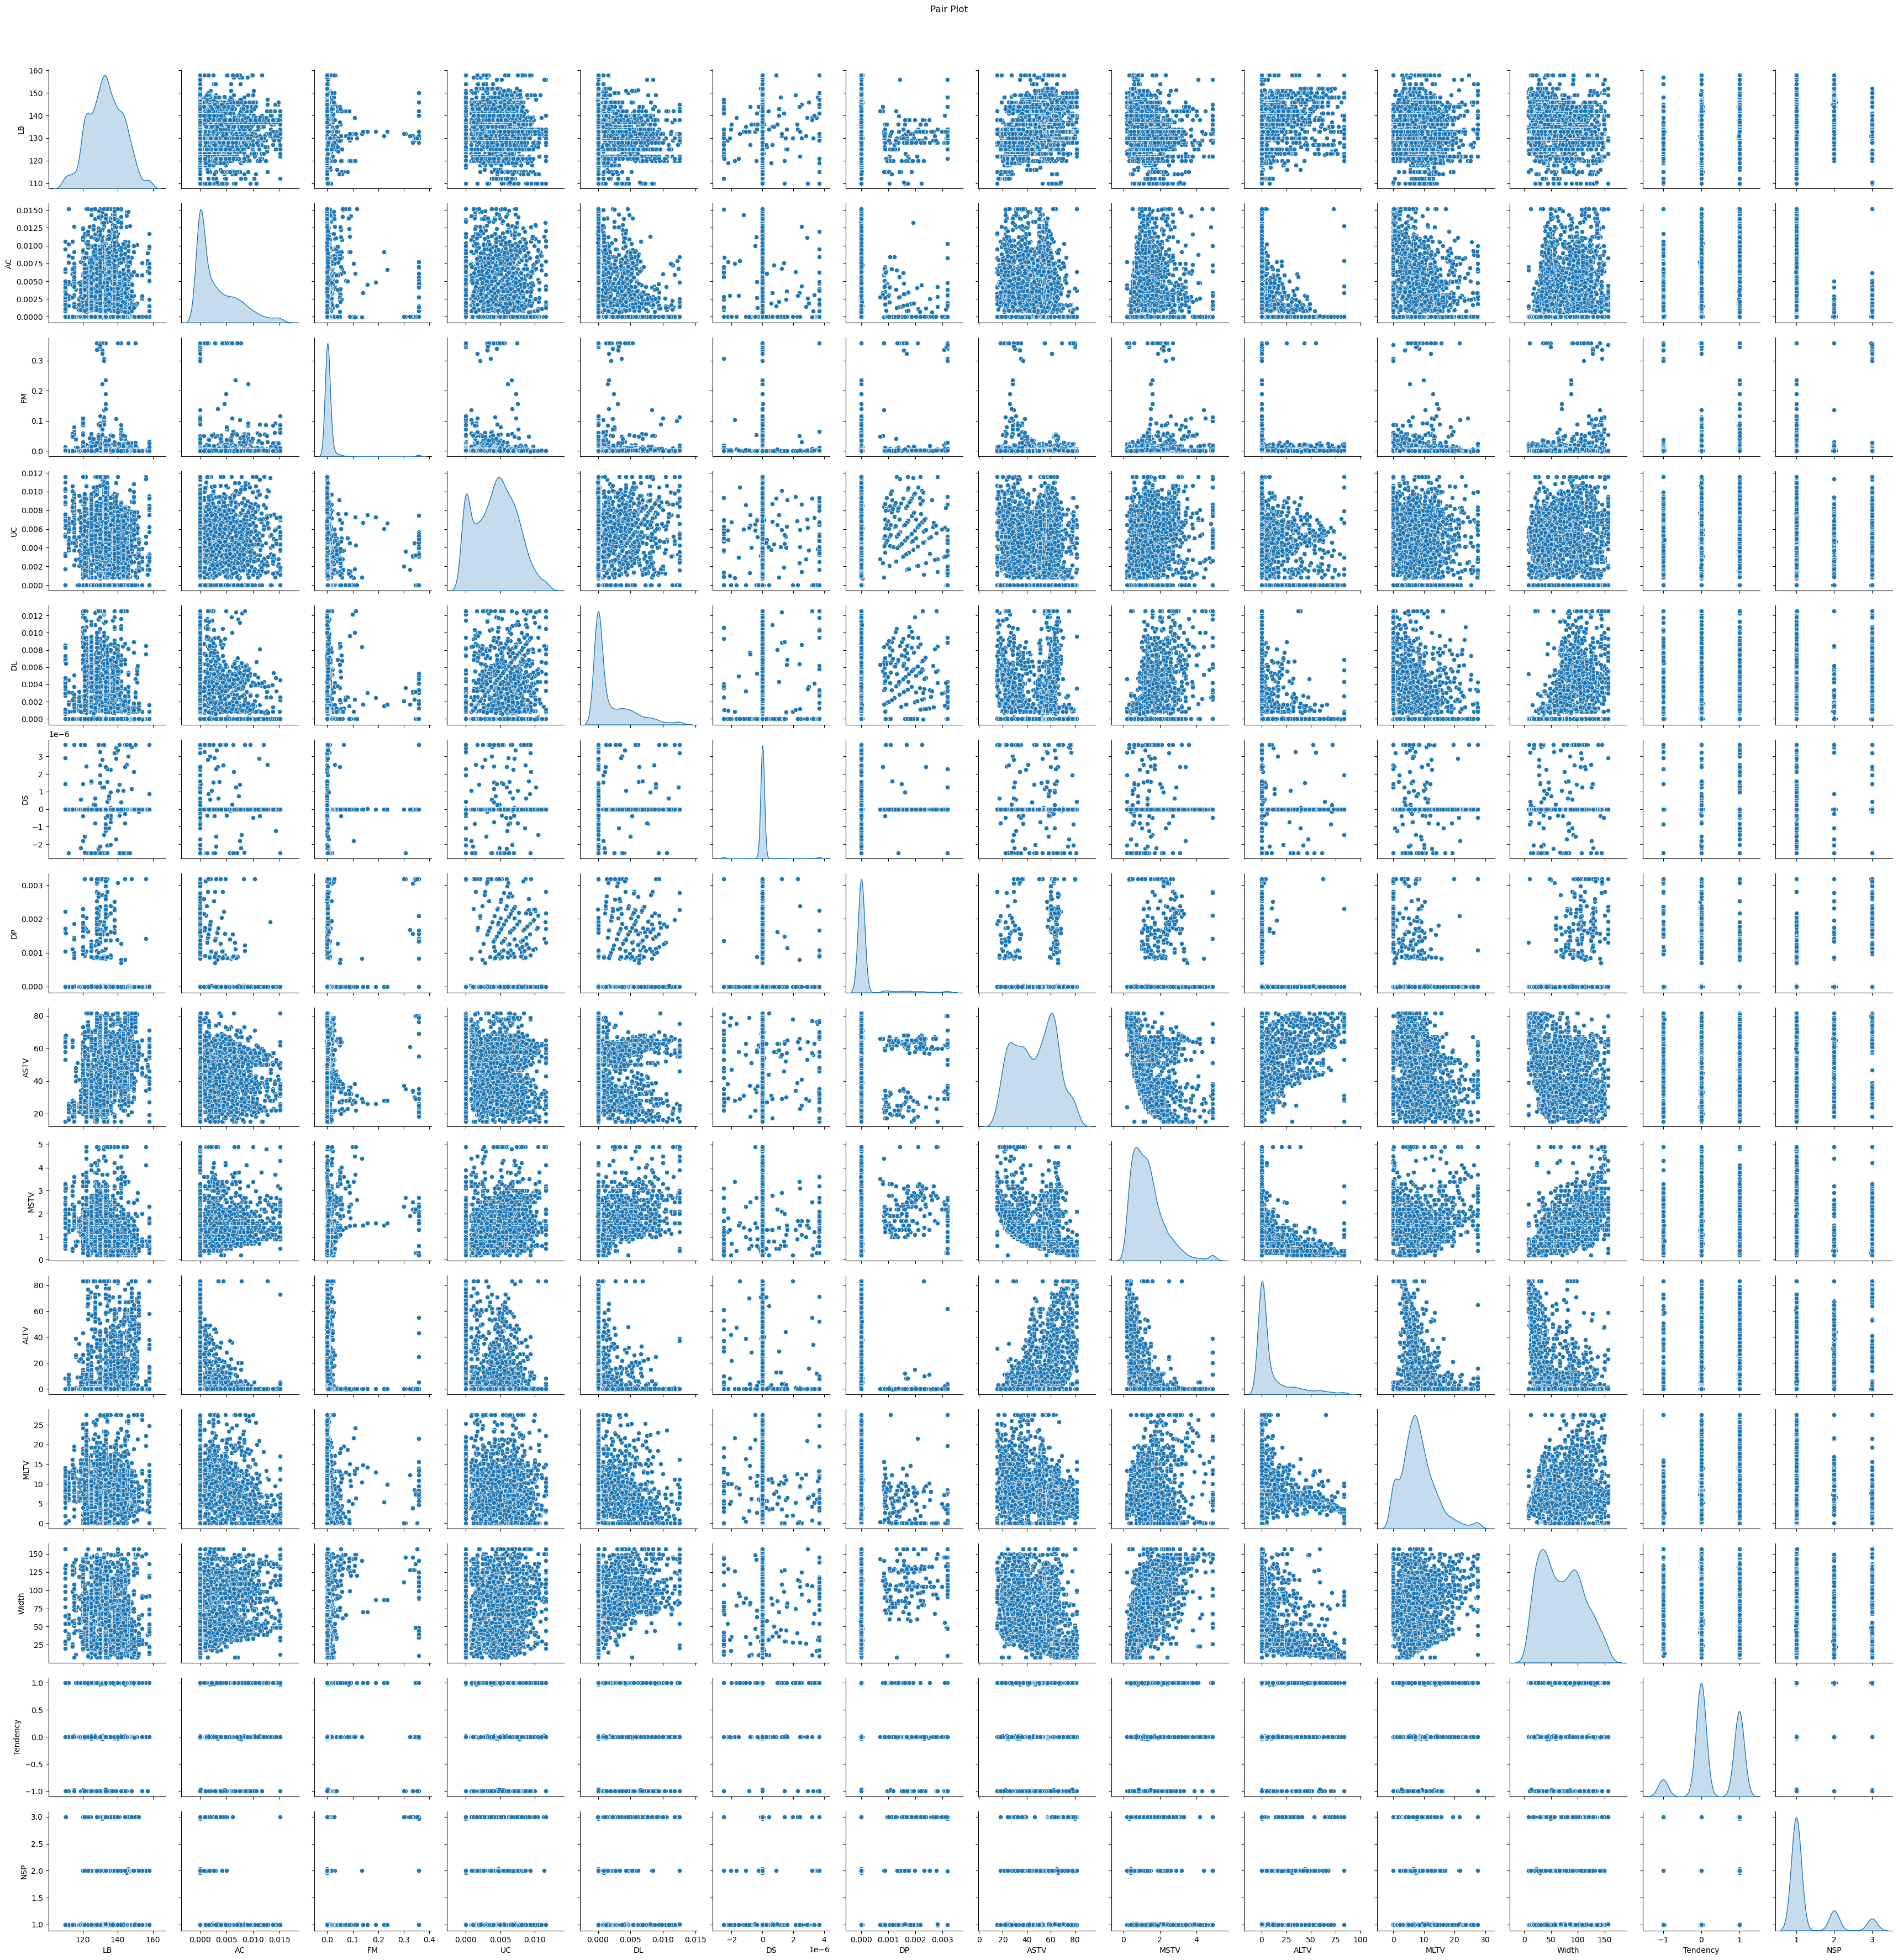

In [29]:
sns.pairplot(df[numerical_columns], diag_kind='kde', height=2.5)
plt.suptitle("Pair Plot", y=1.02)
plt.show()